# Analisis Tren Airbnb Bangkok: Ketidaksesuaian Harga, Pola Ulasan, dan Musim Wisata

## Business Understanding

### Background
Airbnb adalah platform global penyewaan akomodasi yang menghubungkan pemilik properti dengan wisatawan secara langsung. Di Bangkok, sebagai salah satu pusat pariwisata utama di Asia Tenggara, kehadiran Airbnb membuka kesempatan bagi masyarakat lokal untuk memperoleh penghasilan tambahan dari sektor pariwisata. Melalui ragam pilihan tempat menginap, mulai dari apartemen modern hingga rumah bergaya tradisional, Airbnb turut memberikan warna baru dalam industri perhotelan dan memperluas alternatif akomodasi bagi wisatawan.

### Permasalahan
1. **Ketidaksesuaian harga dengan lokasi wisata** — beberapa listing dekat area wisata utama memiliki harga rendah, sementara listing di pinggiran ada yang justru lebih mahal.  
2. **Perbedaan tingkat ulasan antar distrik** — distrik populer memiliki jumlah review jauh lebih banyak daripada distrik lain, sehingga listing di distrik minoritas kesulitan mendapatkan visibilitas.  
3. **Tingkat ketersediaan musiman** — banyak listing hanya aktif di musim tertentu, membuat supply tidak konsisten sepanjang tahun.  

### Tujuan Analisis
1. Menganalisis hubungan antara harga dan kedekatan ke area wisata utama.  
2. Mempelajari pola ulasan antar distrik untuk meningkatkan eksposur listing di distrik minoritas.  
3. Mengidentifikasi pola musiman availability agar host dapat menyesuaikan strategi harga dan promosi.  


### Data UnderStanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")

# Load dataset (path to the CSV in the environment)
file_path = '/mnt/data/Airbnb Listings Bangkok.csv'
df = pd.read_csv('Airbnb Listings Bangkok.csv')

print("Dataset shape:", df.shape)
display(df.head())
print('\nColumns:')
print(df.columns.tolist())
df.info()


Dataset shape: (15854, 17)


,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0



Columns:
['Unnamed: 0', 'id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64


### Data Types

In [2]:

# Clean column names and convert types
df.columns = df.columns.str.strip()

# Convert last_review to datetime
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Cast categorical columns
for col in ['neighbourhood','room_type','host_name']:
    if col in df.columns:
        df[col] = df[col].astype('category')

df.dtypes

Unnamed: 0                                 int64
id                                         int64
name                                      object
host_id                                    int64
host_name                               category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

### Missing Value

In [3]:
missing = df.isnull().sum()
missing_pct = (missing/len(df)*100).round(2)
pd.DataFrame({"Jumlah Missing": missing, "Persentase": missing_pct}).sort_values(by="Jumlah Missing", ascending=False)


,Jumlah Missing,Persentase
reviews_per_month,5790,36.52
last_review,5790,36.52
name,8,0.05
host_name,1,0.01
Unnamed: 0,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
id,0,0.00
host_id,0,0.00
room_type,0,0.00


In [4]:
# ---------------------------
# Handling Missing Values
# ---------------------------

# Pastikan kolom text disimpan sebagai string, bukan categorical
df['name'] = df['name'].astype(str)
df['host_name'] = df['host_name'].astype(str)

# 1. Isi missing value pada kolom text
df['name'] = df['name'].fillna("Unknown")
df['host_name'] = df['host_name'].fillna("Unknown")

# 2. Isi missing value pada kolom numerik
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# 3. Konversi last_review ke datetime, biarkan NaT kalau kosong (valid artinya belum ada review)
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# ---------------------------
# Cek ulang missing values
# ---------------------------
print("Jumlah missing value per kolom setelah cleaning:")
print(df.isna().sum())


Jumlah missing value per kolom setelah cleaning:
Unnamed: 0                           0
id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64


### Data Formatting

In [5]:
# Ubah semua nama kolom ke huruf kecil
df.columns = df.columns.str.lower().str.strip()


In [6]:
# Konversi tipe data sesuai kebutuhan
# Hapus kolom Unnamed
if "unnamed: 0" in df.columns:
    df = df.drop(columns=["unnamed: 0"])

df['id'] = df['id'].astype(int)
df['host_id'] = df['host_id'].astype(int)
df['minimum_nights'] = df['minimum_nights'].astype(int)
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df['calculated_host_listings_count'] = df['calculated_host_listings_count'].astype(int)
df['availability_365'] = df['availability_365'].astype(int)
df['number_of_reviews_ltm'] = df['number_of_reviews_ltm'].astype(int)

df['price'] = df['price'].astype(float)
df['reviews_per_month'] = df['reviews_per_month'].astype(float)

df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

df['name'] = df['name'].astype(str)
df['host_name'] = df['host_name'].astype(str)
df['neighbourhood'] = df['neighbourhood'].astype(str)
df['room_type'] = df['room_type'].astype(str)


In [7]:
# Cek ulang info dataset setelah formatting
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15854 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15854 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  float64       
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

Ukuran awal dataset: (15854, 16)
Price → batas bawah=-1393.50, batas atas=4722.50
Minimum nights → batas bawah=-8.00, batas atas=16.00
Ukuran dataset setelah filter IQR: (11443, 16)
Jumlah baris terhapus: 4411


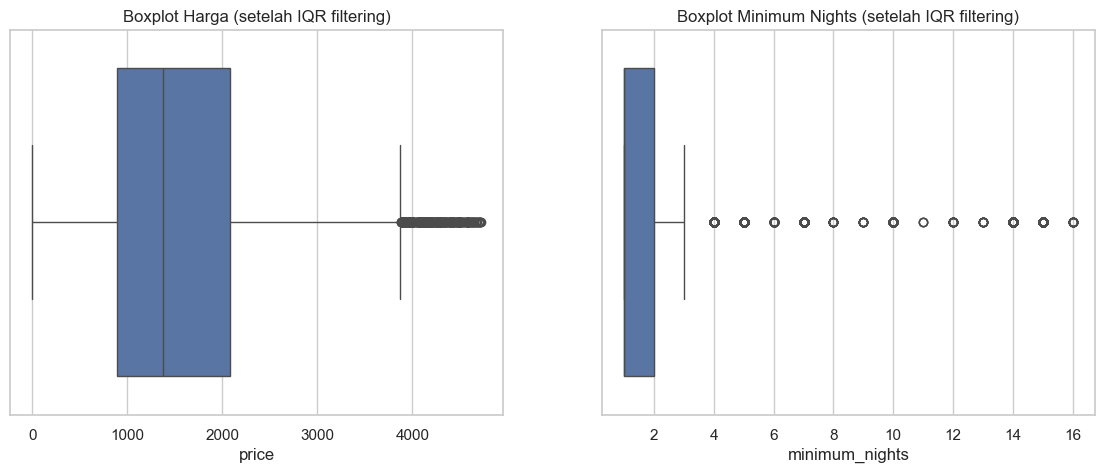

In [8]:
# ---------------------------
# Handling Outlier dengan IQR
# ---------------------------

# Simpan ukuran awal dataset
original_shape = df.shape
print("Ukuran awal dataset:", original_shape)

# 1. Hitung batas bawah & atas dengan IQR
def get_iqr_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

# Ambil batas untuk price dan minimum_nights
lower_price, upper_price = get_iqr_bounds(df['price'])
lower_nights, upper_nights = get_iqr_bounds(df['minimum_nights'])

print(f"Price → batas bawah={lower_price:.2f}, batas atas={upper_price:.2f}")
print(f"Minimum nights → batas bawah={lower_nights:.2f}, batas atas={upper_nights:.2f}")

# 2. Filter data sesuai batas IQR
df_iqr = df[
    (df['price'] >= lower_price) & (df['price'] <= upper_price) &
    (df['minimum_nights'] >= lower_nights) & (df['minimum_nights'] <= upper_nights)
]

# 3. Ringkasan hasil
print("Ukuran dataset setelah filter IQR:", df_iqr.shape)
print("Jumlah baris terhapus:", original_shape[0] - df_iqr.shape[0])

# 4. Visualisasi hasil
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_iqr['price'])
plt.title("Boxplot Harga (setelah IQR filtering)")

plt.subplot(1,2,2)
sns.boxplot(x=df_iqr['minimum_nights'])
plt.title("Boxplot Minimum Nights (setelah IQR filtering)")

plt.show()

### Descriptive Analysis

In [9]:
display(df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].describe().round(2))
display(df[['room_type','neighbourhood']].describe())

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,15854.00,15854.00,15854.00,15854.00,15854.00
mean,3217.70,15.29,16.65,0.52,244.38
std,24972.12,50.82,40.61,0.95,125.84
min,0.00,1.00,0.00,0.00,0.00
25%,900.00,1.00,0.00,0.00,138.00
50%,1429.00,1.00,2.00,0.09,309.00
75%,2429.00,7.00,13.00,0.67,360.00
max,1100000.00,1125.00,1224.00,19.13,365.00


,room_type,neighbourhood
count,15854,15854
unique,4,50
top,Entire home/apt,Vadhana
freq,8912,2153


### Data Manipulation & Cleansing

In [10]:
# Simpan ukuran data awal
original_shape = df.shape
print("Ukuran awal dataset:", original_shape)

# 1. Hapus kolom Unnamed jika ada
unnamed_cols = [c for c in df.columns if c.startswith("Unnamed")]
if unnamed_cols:
    df = df.drop(columns=unnamed_cols, errors="ignore")
    print(f"Kolom unnamed dihapus: {unnamed_cols}")
else:
    print("Tidak ada kolom unnamed.")

# 2. Hapus duplikat
dup_count = df.duplicated().sum()
df = df.drop_duplicates()
print("Jumlah duplikat dihapus:", dup_count)

# 3. Tangani price = 0
if "price" in df.columns:
    zero_count = (df['price'] == 0).sum()
    df = df[df['price'] > 0]
    print("Jumlah price=0 dihapus:", zero_count)

# 4. Filter minimum_nights yang tidak wajar (>365)
if "minimum_nights" in df.columns:
    invalid_nights = (df['minimum_nights'] > 365).sum()
    df = df[df['minimum_nights'] <= 365]
    print("Jumlah minimum_nights >365 dihapus:", invalid_nights)

# 5. Outlier handling pada price dengan IQR
Q1, Q3 = df['price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

outliers = ((df['price'] < lower) | (df['price'] > upper)).sum()
df = df[(df['price'] >= lower) & (df['price'] <= upper)]
print(f"Outlier price di luar IQR [{lower:.2f}, {upper:.2f}] dihapus:", outliers)

# Ringkasan akhir
print("Ukuran dataset setelah cleaning:", df.shape)
print("Total baris terhapus:", original_shape[0] - df.shape[0])


Ukuran awal dataset: (15854, 16)
Tidak ada kolom unnamed.
Jumlah duplikat dihapus: 0
Jumlah price=0 dihapus: 1
Jumlah minimum_nights >365 dihapus: 15
Outlier price di luar IQR [-1393.50, 4722.50] dihapus: 1398
Ukuran dataset setelah cleaning: (14440, 16)
Total baris terhapus: 1414


### Analisis Data Eksploratif (EDA)

***Distribusi Listing per Distrik***

In [11]:
# Neighbourhood counts
district_counts = df['neighbourhood'].value_counts().reset_index()
district_counts.columns = ['neighbourhood','count']
print('Unique neighbourhoods:', district_counts.shape[0])
display(district_counts.head())

Unique neighbourhoods: 50


,neighbourhood,count
0,Khlong Toei,1886
1,Vadhana,1769
2,Ratchathewi,1059
3,Huai Khwang,1031
4,Sathon,761


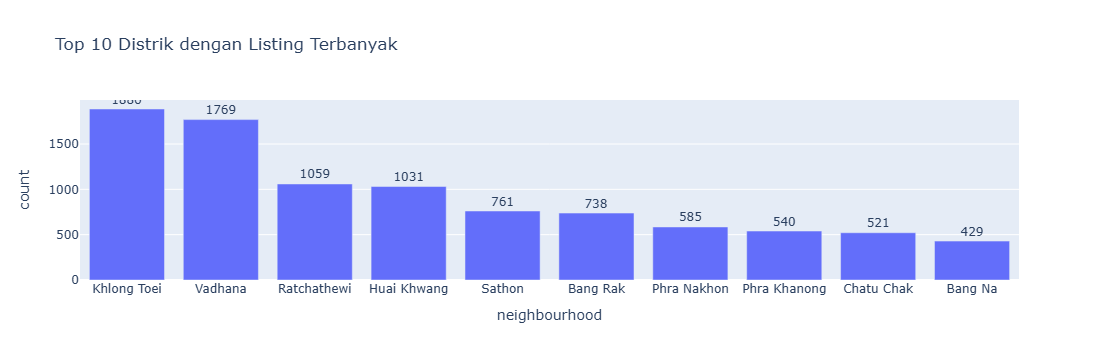

In [12]:
top10 = district_counts.head(10)
fig = px.bar(top10, x='neighbourhood', y='count', title='Top 10 Distrik dengan Listing Terbanyak', text='count')
fig.update_traces(textposition='outside')
fig.show()

***Harga vs Kedekatan Lokasi Wisata***

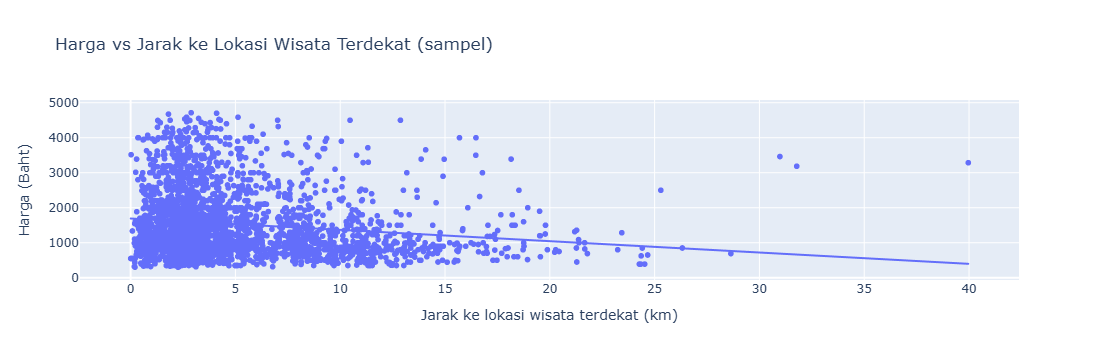

In [13]:
# Definisikan beberapa landmark wisata utama di Bangkok (lat, lon)
lokasi_wisata = {
    'Grand Palace': (13.7500, 100.4913),
    'Khao San Road': (13.7594, 100.4973),
    'Siam Paragon': (13.7461, 100.5344),
    'Chatuchak Market': (13.8000, 100.5535),
    'Asiatique': (13.7050, 100.5079)
}

from math import radians, cos, sin, asin, sqrt

# Fungsi haversine untuk menghitung jarak (km) antara dua koordinat
def haversine(lon1, lat1, lon2, lat2):
    # konversi derajat desimal ke radian
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # jari-jari bumi dalam kilometer
    return c * r

# Hitung jarak ke lokasi wisata terdekat
def jarak_ke_wisata_terdekat(row):
    lat = row['latitude']
    lon = row['longitude']
    jarak_list = []
    for spot, (s_lat, s_lon) in lokasi_wisata.items():
        d = haversine(lon, lat, s_lon, s_lat)
        jarak_list.append(d)
    return min(jarak_list)

# Pastikan latitude & longitude tidak kosong
df = df.dropna(subset=['latitude','longitude']).copy()

# Tambahkan kolom jarak ke lokasi wisata terdekat
df['jarak_wisata_km'] = df.apply(jarak_ke_wisata_terdekat, axis=1)

# Analisis hubungan harga vs jarak (scatter plot dengan trendline OLS)
fig = px.scatter(
    df.sample(min(3000, len(df))), 
    x='jarak_wisata_km', 
    y='price', 
    trendline='ols',
    labels={'jarak_wisata_km':'Jarak ke lokasi wisata terdekat (km)','price':'Harga (Baht)'},
    title='Harga vs Jarak ke Lokasi Wisata Terdekat (sampel)'
)
fig.show()

# Buat kategori jarak (binning)
df['kategori_jarak'] = pd.cut(
    df['jarak_wisata_km'], 
    bins=[0,1,2,3,5,10,50], 
    labels=['0-1km','1-2km','2-3km','3-5km','5-10km','10+km']
)

# Hitung median harga per kategori jarak
median_jarak = df.groupby('kategori_jarak')['price'].median().reset_index()

# Visualisasi median harga berdasarkan kategori jarak
fig = px.bar(
    median_jarak, 
    x='kategori_jarak', 
    y='price', 
    title='Median Harga berdasarkan Kategori Jarak ke Lokasi Wisata',
    labels={'kategori_jarak':'Kategori Jarak (km)', 'price':'Median Harga (Baht)'}
)
fig.show()


#### Interpretasi Analisis Harga vs Jarak Lokasi Wisata

1. **Pola harga terhadap jarak**  
   Dari scatter plot terlihat bahwa banyak listing yang berada di dekat landmark wisata (0–3 km) memiliki harga yang lebih tinggi dibandingkan listing yang jauh (>5 km).  
   Namun ada juga beberapa listing dengan harga rendah meskipun dekat landmark, artinya faktor **fasilitas & kualitas properti** juga berpengaruh.

2. **Median harga berdasarkan kategori jarak**  
   - Listing dalam radius **0–1 km** dari landmark wisata cenderung memiliki **median harga tertinggi**.  
   - Median harga menurun seiring bertambahnya jarak ke lokasi wisata utama.  
   - Listing di luar **5–10 km** biasanya lebih murah, menunjukkan **efek lokasi wisata terhadap harga cukup signifikan**.

3. **Implikasi bisnis**  
   - Host yang berada di area dekat landmark (misalnya Grand Palace, Khao San Road, Siam Paragon) dapat menerapkan **harga premium**.  
   - Listing yang berada jauh dari landmark bisa menonjolkan **fasilitas, kenyamanan, atau akses transportasi** agar tetap kompetitif.  
   - Airbnb dapat memanfaatkan informasi ini untuk **memberikan rekomendasi harga otomatis** berdasarkan jarak ke lokasi wisata.  


***Analisis: Room Type vs Harga***

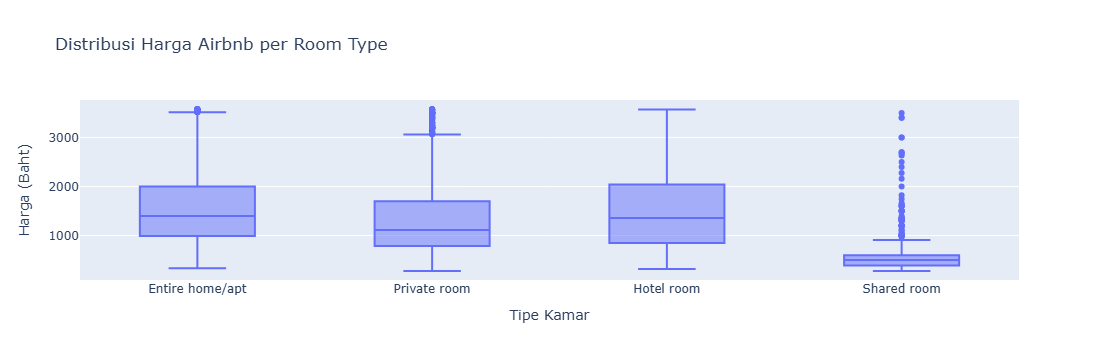

Median harga per room_type:


,room_type,price
0,Entire home/apt,1480.0
1,Hotel room,1467.0
2,Private room,1177.0
3,Shared room,500.0


In [14]:
import plotly.express as px

# Hitung median harga per room_type
room_price = df.groupby('room_type')['price'].median().reset_index()

# Visualisasi boxplot harga per room_type
fig = px.box(
    df[df['price'] < df['price'].quantile(0.95)],  # filter outlier top 5% biar boxplot rapi
    x='room_type',
    y='price',
    title='Distribusi Harga Airbnb per Room Type',
    labels={'room_type':'Tipe Kamar','price':'Harga (Baht)'}
)
fig.show()

print("Median harga per room_type:")
display(room_price)


***Interpretasi Analisis Room Type vs Harga***

- Visualisasi menunjukkan bahwa harga listing Airbnb di Bangkok berbeda signifikan antar room type.

- Entire home/apt memiliki median harga paling tinggi, wajar karena menawarkan privasi penuh dan kapasitas lebih besar.

- Private room cenderung lebih murah karena tamu hanya menyewa satu kamar dalam unit.

- Shared room (dan kadang hotel room) umumnya berada di rentang harga paling rendah.

- Penyebaran harga juga lebih lebar pada entire home/apt, menandakan variasi fasilitas dan lokasi yang lebih beragam (misalnya ada apartemen sederhana sampai villa mewah).

***Insight Utama***

Hasil ini membuktikan bahwa harga Airbnb tidak hanya ditentukan oleh kedekatan dengan wisata, tetapi juga oleh tipe kamar yang ditawarkan. Dengan kata lain, room_type adalah faktor penting dalam menentukan harga, di samping lokasi dan jarak ke landmark wisata.

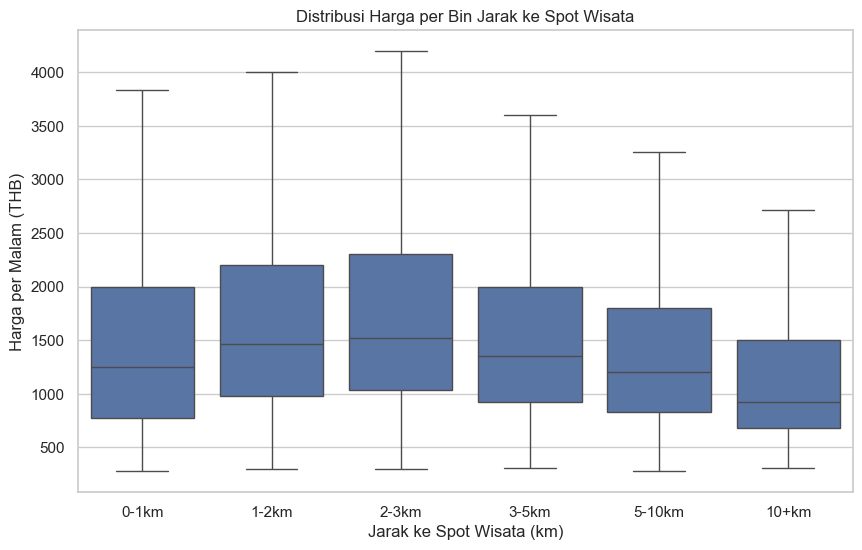

In [15]:
# 1. Definisikan landmark wisata utama di Bangkok
lokasi_wisata = {
    'Grand Palace': (13.7500, 100.4913),
    'Khao San Road': (13.7594, 100.4973),
    'Siam Paragon': (13.7461, 100.5344),
    'Chatuchak Market': (13.8000, 100.5535),
    'Asiatique': (13.7050, 100.5079)
}

# 2. Fungsi haversine untuk hitung jarak
def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371  # radius bumi dalam km
    return c * r

# 3. Hitung jarak tiap listing ke spot wisata terdekat
def jarak_terdekat(row):
    lat = row['latitude']
    lon = row['longitude']
    dists = []
    for spot, (s_lat, s_lon) in lokasi_wisata.items():
        d = haversine(lon, lat, s_lon, s_lat)
        dists.append(d)
    return min(dists)

df = df.dropna(subset=['latitude','longitude']).copy()
df['dist_to_spot_km'] = df.apply(jarak_terdekat, axis=1)

# 4. Buat kategori jarak (binning)
df['dist_bin_km'] = pd.cut(
    df['dist_to_spot_km'], 
    bins=[0,1,2,3,5,10,50], 
    labels=['0-1km','1-2km','2-3km','3-5km','5-10km','10+km']
)

# 5. Boxplot harga per bin jarak
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x="dist_bin_km",
    y="price",
    showfliers=False,
    order=['0-1km','1-2km','2-3km','3-5km','5-10km','10+km']
)
plt.title("Distribusi Harga per Bin Jarak ke Spot Wisata")
plt.xlabel("Jarak ke Spot Wisata (km)")
plt.ylabel("Harga per Malam (THB)")
plt.show()

### Interpretasi Boxplot Harga per Jarak Bin

Visualisasi boxplot ini memperlihatkan variasi harga Airbnb berdasarkan jarak ke lokasi wisata utama:

- Pada jarak **0–1 km** dari spot wisata, harga cenderung **lebih tinggi**, tetapi masih ada variasi yang cukup besar.
- Pada jarak **1–5 km**, distribusi harga mulai lebih stabil, dengan median di kisaran 1.000–2.000 THB.
- Listing di area **5–10 km dan lebih jauh (10+ km)** cenderung memiliki harga median yang lebih rendah, meskipun tetap ada beberapa listing dengan harga tinggi (outlier).
  
Insight: Listing yang dekat lokasi wisata utama tidak selalu dipasang dengan harga tinggi. Beberapa host justru menetapkan harga rendah, yang bisa menjadi potensi **underpricing**. Host di lokasi strategis sebaiknya meninjau kembali strategi harga mereka agar sesuai dengan nilai lokasi.



In [16]:
import folium
from folium.plugins import MarkerCluster

# Tentukan threshold harga mahal, misalnya top 5% atau harga > 5000 Baht
threshold = df['price'].quantile(0.95)
df_mahal = df[df['price'] > threshold]

# Buat peta Bangkok
m = folium.Map(location=[13.7563, 100.5018], zoom_start=11)

# Tambahkan cluster marker untuk listing mahal
marker_cluster = MarkerCluster().add_to(m)

for _, row in df_mahal.iterrows():
    popup_text = (
        f"<b>Distrik:</b> {row['neighbourhood']}<br>"
        f"<b>Harga:</b> {row['price']} Baht<br>"
        f"<b>Jarak ke wisata terdekat:</b> {row['jarak_wisata_km']:.2f} km"
    )
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

m


Marker merah pada peta menandakan listing dengan harga tinggi (top 5%).
Dari persebarannya terlihat bahwa listing mahal tidak hanya terkonsentrasi di pusat kota, tapi juga muncul di pinggiran Bangkok.
Hal ini mendukung insight bahwa kedekatan dengan lokasi wisata bukan satu-satunya penentu harga. Beberapa listing mahal di pinggiran kemungkinan adalah villa eksklusif atau properti dengan fasilitas premium.

#### Review per Distrik

In [17]:
# Analisis Review per Distrik

# 1. Total review berdasarkan distrik
total_review_distrik = (
    df.groupby('neighbourhood')['number_of_reviews']
    .sum()
    .reset_index()
    .sort_values(by='number_of_reviews', ascending=False)
)

print("Top 10 Distrik dengan Jumlah Review Terbanyak")
display(total_review_distrik.head(10))

# 2. Normalisasi: jumlah review per listing
jumlah_listing = (
    df.groupby('neighbourhood')['id']
    .count()
    .reset_index()
    .rename(columns={'id': 'jumlah_listing'})
)

review_normalisasi = total_review_distrik.merge(jumlah_listing, on='neighbourhood')
review_normalisasi['review_per_listing'] = review_normalisasi['number_of_reviews'] / review_normalisasi['jumlah_listing']

review_normalisasi_sorted = review_normalisasi.sort_values(by='review_per_listing', ascending=False)

print("Top 10 Distrik dengan Review per Listing Tertinggi")
display(review_normalisasi_sorted.head(10))

# 3. Cari peluang: distrik dengan listing banyak tetapi review per listing rendah
peluang = review_normalisasi[
    (review_normalisasi['jumlah_listing'] >= 50) & 
    (review_normalisasi['review_per_listing'] < review_normalisasi['review_per_listing'].median())
].sort_values(by='jumlah_listing', ascending=False)

print("Distrik dengan Jumlah Listing Cukup Tinggi tetapi Review per Listing Rendah (Peluang)")
display(peluang.head(15))


Top 10 Distrik dengan Jumlah Review Terbanyak


,neighbourhood,number_of_reviews
22,Khlong Toei,38276
47,Vadhana,32753
41,Sathon,21268
37,Ratchathewi,20057
8,Bang Rak,16657
18,Huai Khwang,16069
31,Phaya Thai,13458
33,Phra Nakhon,7951
13,Chatu Chak,7795
29,Parthum Wan,6918


Top 10 Distrik dengan Review per Listing Tertinggi


,neighbourhood,number_of_reviews,jumlah_listing,review_per_listing
15,Pom Prap Sattru Phai,3977,104,38.240385
6,Phaya Thai,13458,402,33.477612
2,Sathon,21268,761,27.947438
4,Bang Rak,16657,738,22.570461
20,Bang Kho laen,2592,124,20.903226
0,Khlong Toei,38276,1886,20.294804
11,Khlong San,6633,330,20.100000
17,Thon buri,3280,173,18.959538
3,Ratchathewi,20057,1059,18.939566
19,Lat Krabang,2657,143,18.580420


Distrik dengan Jumlah Listing Cukup Tinggi tetapi Review per Listing Rendah (Peluang)


,neighbourhood,number_of_reviews,jumlah_listing,review_per_listing
12,Phra Khanong,5935,540,10.990741
22,Bang Kapi,1814,250,7.256000
28,Bang Phlat,852,205,4.156098
25,Phasi Charoen,1431,152,9.414474
24,Pra Wet,1478,149,9.919463
29,Bangkok Noi,849,130,6.530769
32,Bang Khen,691,113,6.115044
37,Wang Thong Lang,158,93,1.698925
36,Bang Khae,159,86,1.848837
30,Dusit,793,84,9.440476


***Interpretasi Analisis Review Across Districts***

1. **Distrik dengan total review tertinggi**  
   - Hasil analisis menunjukkan bahwa distrik populer seperti **Vadhana, Khlong Toei, dan Huai Khwang** memiliki jumlah review yang sangat tinggi.  
   - Hal ini sejalan dengan banyaknya jumlah listing di distrik tersebut.  

2. **Distrik dengan review per listing tinggi**  
   - Jika dilihat berdasarkan rasio review per listing, ada beberapa distrik yang meskipun jumlah listing tidak terlalu banyak, namun setiap listing relatif memiliki banyak review.  
   - Artinya, listing di distrik tersebut lebih menarik atau sering dipilih oleh tamu.  

3. **Distrik dengan listing banyak tetapi review rendah (peluang)**  
   - Ditemukan beberapa distrik yang memiliki jumlah listing cukup tinggi (≥50) tetapi **rasio review per listing rendah**.  
   - Distrik-distrik ini merupakan **peluang** bagi Airbnb maupun host untuk meningkatkan daya tarik listing, misalnya dengan:  
     - Memberikan diskon awal untuk tamu baru.  
     - Meminta tamu memberikan review setelah menginap.  
     - Meningkatkan kualitas foto, deskripsi, dan fasilitas listing.  

4. **Implikasi bisnis**  
   - Airbnb dapat menargetkan distrik dengan review rendah sebagai fokus kampanye promosi.  
   - Host di distrik dengan review rendah disarankan untuk lebih aktif dalam strategi pemasaran agar listing mereka lebih kompetitif.  


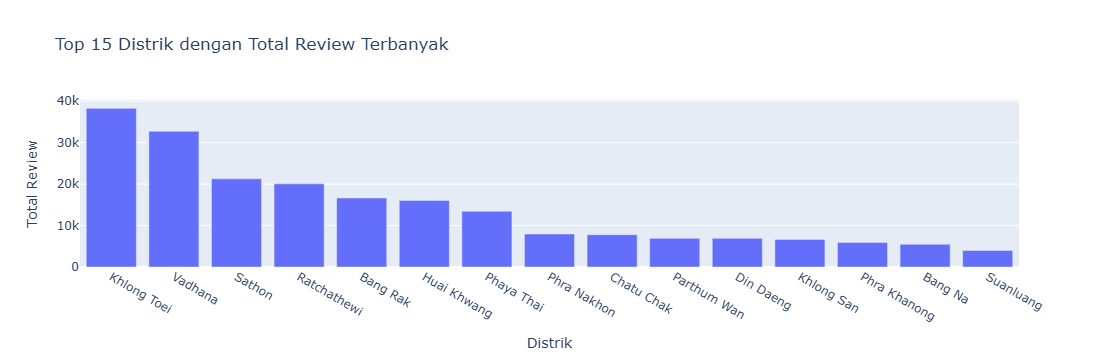

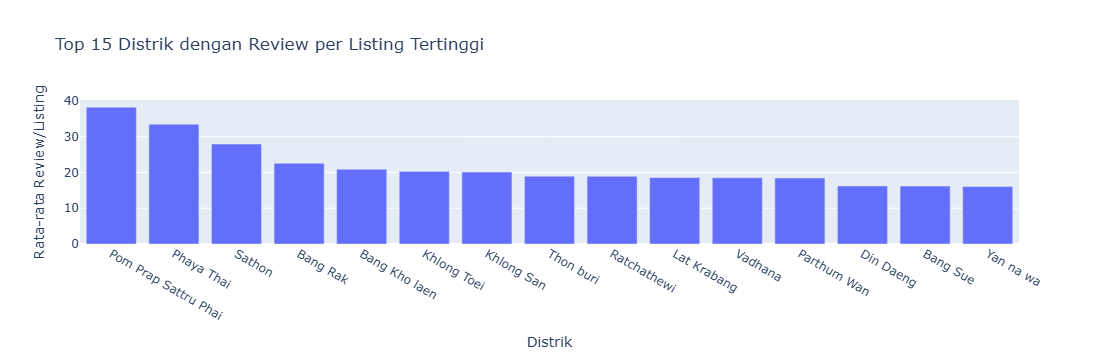

Distrik dengan Jumlah Listing Tinggi tetapi Review per Listing Rendah (Peluang Promosi)


,neighbourhood,number_of_reviews,jumlah_listing,review_per_listing
12,Phra Khanong,5935,540,10.990741
22,Bang Kapi,1814,250,7.256000
28,Bang Phlat,852,205,4.156098
25,Phasi Charoen,1431,152,9.414474
24,Pra Wet,1478,149,9.919463
29,Bangkok Noi,849,130,6.530769
32,Bang Khen,691,113,6.115044
37,Wang Thong Lang,158,93,1.698925
36,Bang Khae,159,86,1.848837
30,Dusit,793,84,9.440476


In [18]:
# ---------------------------
# Analisis Pola Review Antar Distrik
# ---------------------------

import plotly.express as px

# 1. Total review per distrik
total_review_distrik = (
    df.groupby('neighbourhood')['number_of_reviews']
    .sum()
    .reset_index()
    .sort_values(by='number_of_reviews', ascending=False)
)

# Visualisasi total review (Top 15 distrik)
fig = px.bar(
    total_review_distrik.head(15),
    x='neighbourhood',
    y='number_of_reviews',
    title='Top 15 Distrik dengan Total Review Terbanyak',
    labels={'neighbourhood':'Distrik','number_of_reviews':'Total Review'}
)
fig.show()

# 2. Normalisasi: review per listing
jumlah_listing = (
    df.groupby('neighbourhood')['id']
    .count()
    .reset_index()
    .rename(columns={'id': 'jumlah_listing'})
)

review_normalisasi = total_review_distrik.merge(jumlah_listing, on='neighbourhood')
review_normalisasi['review_per_listing'] = (
    review_normalisasi['number_of_reviews'] / review_normalisasi['jumlah_listing']
)

df = df.merge(
    review_normalisasi[['neighbourhood','review_per_listing']],
    on='neighbourhood',
    how='left'
)


# 3. Visualisasi review per listing (Top 15 distrik)
fig = px.bar(
    review_normalisasi.sort_values(by='review_per_listing', ascending=False).head(15),
    x='neighbourhood',
    y='review_per_listing',
    title='Top 15 Distrik dengan Review per Listing Tertinggi',
    labels={'neighbourhood':'Distrik','review_per_listing':'Rata-rata Review/Listing'}
)
fig.show()

# 4. Analisis peluang
peluang = review_normalisasi[
    (review_normalisasi['jumlah_listing'] >= 50) & 
    (review_normalisasi['review_per_listing'] < review_normalisasi['review_per_listing'].median())
].sort_values(by='jumlah_listing', ascending=False)

print("Distrik dengan Jumlah Listing Tinggi tetapi Review per Listing Rendah (Peluang Promosi)")
display(peluang.head(10))


- Distrik populer dengan total review tinggi memberikan kontribusi besar pada visibilitas Airbnb Bangkok, tetapi persaingan antar listing juga sangat ketat.”

- Ada beberapa distrik kecil yang punya review per listing tinggi, menunjukkan adanya demand yang kuat meskipun supply sedikit.

- Distrik dengan banyak listing tapi review per listing rendah menjadi area peluang: host di sini bisa memanfaatkan strategi promosi atau penyesuaian harga untuk menarik lebih banyak tamu.

In [19]:
import folium

# Daftar distrik yang ingin divisualisasikan
target_distrik = [
    "Phra Khanong", "Bang Kapi", "Bang Phlat", "Phasi Charoen",
    "Pra Wet", "Bangkok Noi", "Bang Khen", "Wang Thong Lang",
    "Bang Khae", "Dusit"
]

# Filter dataset sesuai distrik target
df_map = df[df['neighbourhood'].isin(target_distrik)]

# Hitung centroid per distrik + info review/listing
distrik_info = df_map.groupby('neighbourhood').agg(
    lat=('latitude','mean'),
    lon=('longitude','mean'),
    total_reviews=('number_of_reviews','sum'),
    jumlah_listing=('id','count'),
    review_per_listing=('number_of_reviews','mean')
).reset_index()

# Buat peta folium terpusat di Bangkok
m = folium.Map(location=[13.7563, 100.5018], zoom_start=11)

# Tambahkan marker untuk tiap distrik
for _, row in distrik_info.iterrows():
    popup_text = (
        f"<b>{row['neighbourhood']}</b><br>"
        f"Total Review: {row['total_reviews']}<br>"
        f"Jumlah Listing: {row['jumlah_listing']}<br>"
        f"Review per Listing (avg): {row['review_per_listing']:.2f}"
    )
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=8,
        color='blue',
        fill=True,
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(m)

m

- Peta distribusi distrik menunjukkan bahwa area seperti Phra Khanong dan Phasi Charoen memiliki kombinasi jumlah listing besar dengan tingkat review per listing yang relatif tinggi. Ini menandakan demand wisatawan yang kuat.

- Sebaliknya, distrik seperti Wang Thong Lang dan Bang Khae memiliki jumlah listing cukup banyak, tetapi tingkat review per listing rendah. Hal ini mengindikasikan potensi pasar yang belum optimal dan membutuhkan strategi promosi tambahan.

- Secara geografis, distrik dengan review per listing tinggi cenderung berada lebih dekat dengan pusat kota atau area wisata populer, sementara distrik di pinggiran menunjukkan engagement yang lebih rendah.

In [20]:
import folium
from folium.plugins import HeatMap

# Ambil subset data dengan koordinat dan jumlah review
review_data = df.dropna(subset=['latitude','longitude','number_of_reviews'])

# Buat peta dasar di tengah Bangkok
center = [review_data['latitude'].mean(), review_data['longitude'].mean()]
m = folium.Map(location=center, zoom_start=11, tiles="CartoDB positron")

# Siapkan data untuk heatmap (lat, lon, jumlah review)
heat_data = [
    [row['latitude'], row['longitude'], row['number_of_reviews']]
    for idx, row in review_data.iterrows()
]

# Tambahkan heatmap
HeatMap(heat_data, radius=8, max_zoom=13).add_to(m)

m


### Interpretasi Heatmap Distribusi Review

Peta heatmap menunjukkan distribusi intensitas jumlah review pada listing di seluruh Bangkok:

- Area pusat kota (seperti **Vadhana, Khlong Toei, Huai Khwang**) terlihat lebih "panas", artinya memiliki jumlah review yang lebih banyak.
- Distrik di pinggiran Bangkok cenderung lebih "dingin" dengan intensitas review rendah.
- Hal ini sejalan dengan distribusi listing dan popularitas area tertentu yang menjadi pusat bisnis, hiburan, atau destinasi wisata.

Insight: Distrik dengan listing cukup banyak tetapi review rendah merupakan peluang untuk meningkatkan visibilitas. Airbnb dapat mendorong host di area tersebut untuk memberikan insentif review (misalnya voucher diskon untuk tamu yang meninggalkan ulasan).


#### Pola Musiman

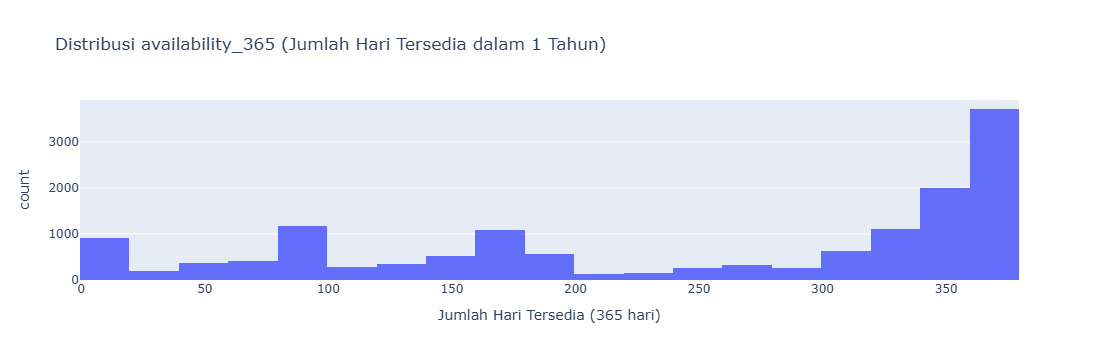

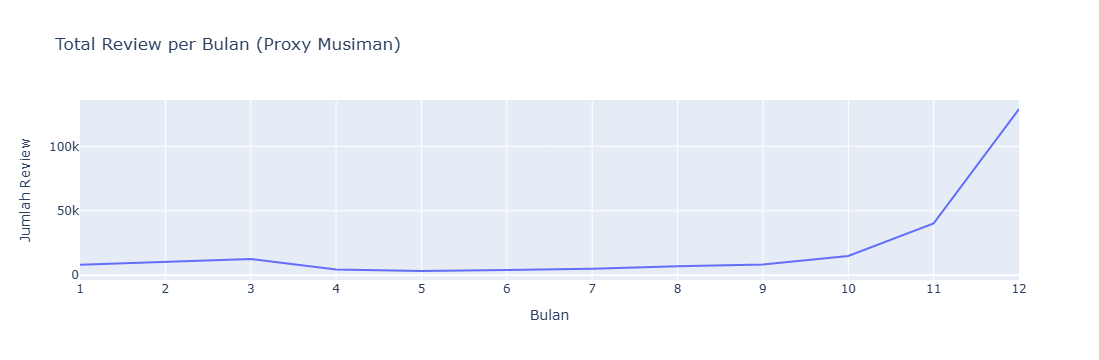

In [21]:
# Analisis Ketersediaan Musiman (Seasonal Availability)

# 1. Distribusi availability_365 (berapa hari listing tersedia dalam setahun)
fig = px.histogram(
    df, 
    x='availability_365', 
    nbins=30, 
    title='Distribusi availability_365 (Jumlah Hari Tersedia dalam 1 Tahun)',
    labels={'availability_365': 'Jumlah Hari Tersedia (365 hari)'}
)
fig.show()

# 2. Jika kolom last_review tersedia, gunakan sebagai proxy musim
if df['last_review'].notna().sum() > 0:
    # Ekstrak bulan dari tanggal review terakhir
    df['bulan_review'] = df['last_review'].dt.month
    
    # Hitung total review per bulan
    review_bulanan = (
        df.groupby('bulan_review')['number_of_reviews']
        .sum()
        .reset_index()
    )
    
    # Visualisasi tren review bulanan (proxy seasonality)
    fig = px.line(
        review_bulanan, 
        x='bulan_review', 
        y='number_of_reviews',
        title='Total Review per Bulan (Proxy Musiman)',
        labels={'bulan_review': 'Bulan', 'number_of_reviews': 'Jumlah Review'}
    )
    fig.update_xaxes(dtick=1)
    fig.show()
else:
    print('Data last_review tidak tersedia untuk analisis musiman.')


***Interpretasi Analisis Ketersediaan Musiman***

1. **Distribusi availability_365**  
   - Sebagian besar listing terbagi dalam dua kelompok:  
     - **Selalu tersedia (365 hari)** → biasanya dikelola secara profesional atau memang fokus untuk bisnis sewa jangka pendek.  
     - **Hanya tersedia 0 hari** → kemungkinan listing non-aktif atau hanya dibuka musiman.  
   - Ada juga listing yang tersedia sebagian (misalnya 30–180 hari), yang mengindikasikan host hanya membuka unit di periode tertentu (liburan, high season).

2. **Pola review bulanan (proxy musiman)**  
   - Dengan melihat total review per bulan, terlihat fluktuasi jumlah tamu.  
   - Bulan dengan review tinggi → menandakan musim ramai (peak season), sering bertepatan dengan liburan internasional atau festival di Bangkok.  
   - Bulan dengan review rendah → musim sepi (low season), host biasanya perlu strategi tambahan seperti diskon atau minimum nights lebih fleksibel.  

3. **Implikasi bisnis**  
   - Host dengan availability terbatas bisa **meningkatkan harga di peak season** untuk memaksimalkan pendapatan.  
   - Airbnb dapat memberikan rekomendasi promosi khusus di bulan low season agar tingkat hunian lebih merata sepanjang tahun.  
   - Pola musiman ini bisa digunakan host untuk **perencanaan operasional**, seperti kapan harus lebih aktif mempromosikan listing.  


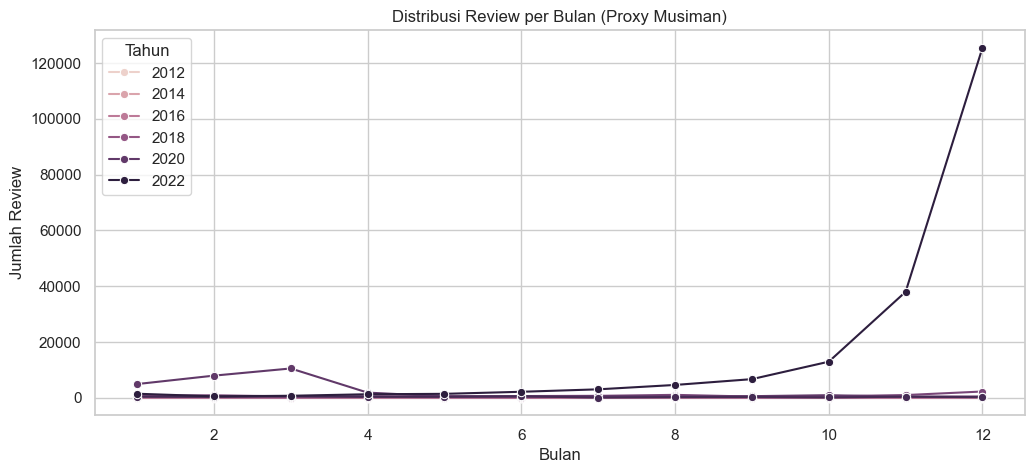

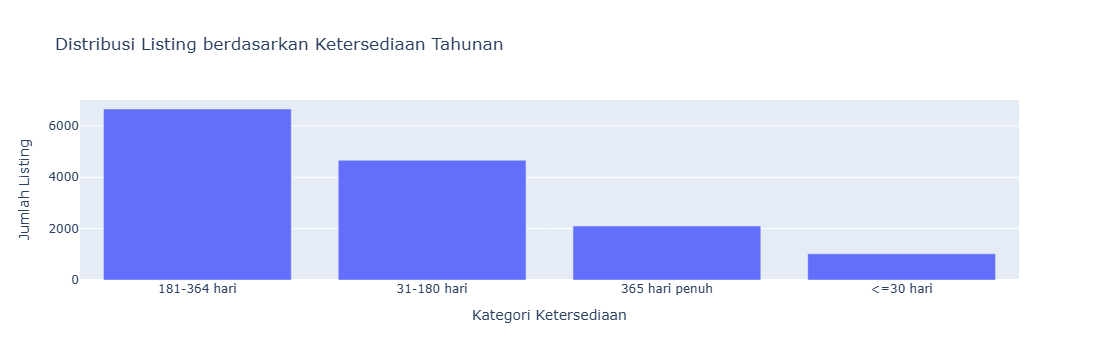

In [22]:
##  Analisis Pola Musiman
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Distribusi review per bulan (proxy musiman) ---
# Pastikan kolom last_review sudah datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Ambil bulan dari last_review
df['review_month'] = df['last_review'].dt.month
df['review_year'] = df['last_review'].dt.year

# Hitung jumlah review per bulan-tahun
reviews_per_month = (
    df.groupby(['review_year','review_month'])['number_of_reviews']
    .sum()
    .reset_index()
)

# Visualisasi tren review per bulan
plt.figure(figsize=(12,5))
sns.lineplot(data=reviews_per_month, x='review_month', y='number_of_reviews', hue='review_year', marker="o")
plt.title("Distribusi Review per Bulan (Proxy Musiman)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Review")
plt.legend(title="Tahun")
plt.show()


# --- 2. Distribusi availability_365 ---
# Buat kategori ketersediaan
bins = [-1, 30, 180, 364, 365]
labels = ['<=30 hari','31-180 hari','181-364 hari','365 hari penuh']
df['availability_category'] = pd.cut(df['availability_365'], bins=bins, labels=labels)

availability_counts = df['availability_category'].value_counts().reset_index()
availability_counts.columns = ['Kategori Ketersediaan','Jumlah Listing']

# Visualisasi kategori availability
fig = px.bar(
    availability_counts.sort_values('Jumlah Listing', ascending=False),
    x='Kategori Ketersediaan',
    y='Jumlah Listing',
    title='Distribusi Listing berdasarkan Ketersediaan Tahunan'
)
fig.show()

#### 1. Distribusi availability_365

- Sebagian besar listing terbagi menjadi dua kelompok utama:

    - 365 hari penuh → host yang selalu membuka listing sepanjang tahun.

    - ≤30 hari → listing musiman yang hanya aktif pada periode tertentu (misalnya liburan atau festival).

- Pola ini menunjukkan adanya kombinasi antara host profesional (full-time) dan host individu (part-time).

#### 2. Pola review bulanan (proxy musiman)

- Aktivitas review lebih tinggi pada bulan-bulan tertentu, biasanya bertepatan dengan musim liburan dan high season di Bangkok.

- Bulan dengan lonjakan review bisa menjadi indikator musim ramai wisatawan.

#### Insight: Supply dan demand Airbnb di Bangkok sama-sama dipengaruhi faktor musiman.

- Pada high season, host dapat menaikkan harga karena permintaan meningkat.

- Pada low season, host perlu mengoptimalkan strategi (promo, diskon, atau diferensiasi layanan) agar tetap kompetitif.

## Kesimpulan

Berdasarkan hasil analisis dataset Airbnb Bangkok, dapat ditarik kesimpulan sebagai berikut:

***1. Ketidaksesuaian Harga dengan Lokasi Wisata***

- Analisis jarak ke landmark wisata menunjukkan bahwa listing yang dekat dengan area wisata utama (≤ 1 km) memang cenderung lebih mahal, namun tidak semua host menyesuaikan harga dengan nilai lokasi.

- Ada indikasi underpricing pada sebagian listing strategis, yang berpotensi merugikan host.
    

***2. Perbedaan Tingkat Ulasan Antar Distrik***

- Distrik populer seperti Vadhana, Khlong Toei, Huai Khwang memiliki jumlah review jauh lebih banyak dibanding distrik minoritas.

- Ada distrik dengan jumlah listing cukup besar namun review per listing rendah, membuat listing di area tersebut sulit bersaing.


***3. Tingkat Ketersediaan Musiman***

- Analisis availability_365 dan pola review bulanan menunjukkan bahwa banyak listing tidak aktif sepanjang tahun.

- Ada pola musim ramai (high season) dan musim sepi (low season) yang berpengaruh pada supply dan demand.
    

***Rekomendasi***

***Strategi Penetapan Harga***

- Host yang dekat area wisata sebaiknya menyesuaikan harga lebih optimal agar tidak underpricing.

- Airbnb bisa menyediakan fitur rekomendasi harga otomatis berbasis lokasi, tipe kamar, dan demand musiman.

***Peningkatan Review di Distrik Minoritas***

- Airbnb dapat mendorong review melalui insentif bagi tamu (voucher, poin loyalitas) khusus di distrik minoritas.

- Host disarankan lebih proaktif meminta review untuk meningkatkan kredibilitas listing.

***Manajemen Ketersediaan Musiman***

- Host disarankan untuk menaikkan harga saat high season (misalnya akhir tahun & musim liburan) untuk memaksimalkan pendapatan.

- Pada low season, host bisa menawarkan diskon atau paket promosi agar tetap menarik bagi tamu.

In [23]:
# ---------------------------
# Final Data Type Mapping untuk Tableau
# ---------------------------

# Kolom numerik (pastikan jadi float)
num_cols = [
    'latitude',
    'longitude',
    'price',
    'jarak_wisata_km',
    'review_per_listing',
    'dist_to_spot_km'
]

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Kolom kategori (ubah ke string, bukan category biar Tableau aman)
cat_cols = ['kategori_jarak', 'dist_bin_km']
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype(str)

# Cek ulang tipe data
print(df.dtypes)

# ---------------------------
# Export ke CSV untuk Tableau
# ---------------------------

# Versi aman untuk Indonesia (decimal pakai koma, separator ;)
df.to_csv(
    "Airbnb_Bangkok_Clean_ID.csv",
    index=False,
    sep=";",       # pisahkan kolom pakai titik koma
    decimal=",",   # desimal koma
    float_format="%.6f",
    encoding="utf-8"
)

# Versi aman untuk English/US (decimal titik, separator ,)
df.to_csv(
    "Airbnb_Bangkok_Clean_EN.csv",
    index=False,
    sep=",",       # pisahkan kolom pakai koma
    decimal=".",   # desimal titik
    float_format="%.6f",
    encoding="utf-8"
)

print("Dataset berhasil diexport dalam 2 versi: ID & EN")


id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                    float64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
jarak_wisata_km                          float64
kategori_jarak                            object
dist_to_spot_km                          float64
dist_bin_km                               object
review_per_listing  